Import Data

In [12]:
#import DataFetcher class from file heart_data.py
import DataFetcher #importing the file DataFetcher.py from the folder data
data_fetcher = DataFetcher.DataFetcher("C:\\Users\\kruth\\OneDrive\\Desktop\\Cardiac_Events_ML\\preprocessing\\final_dataset.csv")
X_train = data_fetcher.get_X_train()
X_test = data_fetcher.get_X_test()
y_train = data_fetcher.get_y_train()
y_test = data_fetcher.get_y_test()
features = data_fetcher.get_features()
target_names = data_fetcher.get_target_names()
X = data_fetcher.get_X()
y = data_fetcher.get_y()

Feature Scaling

In [13]:
#scaling the feature dataset:
from sklearn.preprocessing import StandardScaler 
# fit the Scaler
scaler = StandardScaler() #creating an instance of the StandardScaler class.
#Scaling the values such that the mean is 0 and std deviation is 1.
scaler.fit(X_train) #fitting the scaler to the training set.
X_train = scaler.transform(X_train) #transforming the training set. 
X_test = scaler.transform(X_test) #transforming the testing set.

Model

In [14]:
#import the LogisticRegression class from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

# train the model
#creating an instance of the LogisticRegression class:
lr = LogisticRegression(solver= 'liblinear',random_state = 42 ,max_iter=10, C=0.01, penalty='l2') 
#regularization is applied by default.

#fitting the model to the training set.
lr.fit(X_train, y_train) 

# make predictions on the test dataset
y_pred = lr.predict(X_test)

#---------------------------------Evaluating the model---------------------------------

# Evaluate the model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("\n----------Logistic Regression Metrics----------\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
#meaning of accuracy score: 0.9 means 90% of the predictions are correct

#classification_report
print("\n----------Classification Report----------\n")
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)


----------Logistic Regression Metrics----------

Accuracy: 0.9
Precision: 0.875
Recall: 0.9722222222222222
F1 Score: 0.9210526315789473

----------Classification Report----------

              precision    recall  f1-score   support

           0       0.95      0.79      0.86        24
           1       0.88      0.97      0.92        36

    accuracy                           0.90        60
   macro avg       0.91      0.88      0.89        60
weighted avg       0.90      0.90      0.90        60



Confusion Matrix

[[19  5]
 [ 1 35]]


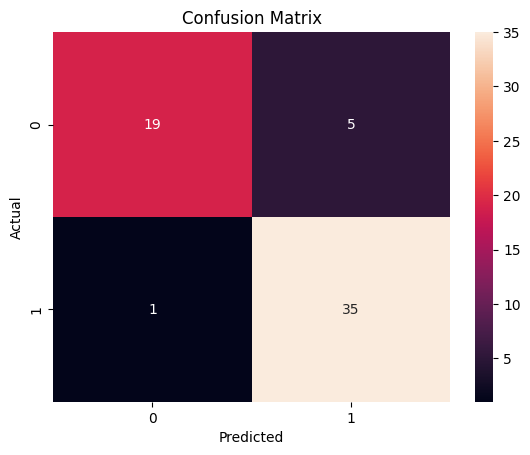

In [15]:
#get the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d") #fmt="d" means the values in the matrix are integers  
#annot=True means the values in the matrix are displayed
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [16]:
#cross validaayion for 10 folds
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_train, y_train, cv=10, scoring="accuracy") #scorinf can be accuracy, precision, recall, f1, roc_auc, etc
#get the scores for each fold
for i in range(10):
    print("Fold", i, ":", scores[i])
#get the mean of the scores
print("Mean:", scores.mean())
#get the standard deviation of the scores
print("Standard Deviation:", scores.std()) #the lower the standard deviation, the better the model
#standard deviation is calculated for the scores of each fold

Fold 0 : 0.75
Fold 1 : 0.8333333333333334
Fold 2 : 0.875
Fold 3 : 0.875
Fold 4 : 0.75
Fold 5 : 0.8333333333333334
Fold 6 : 0.875
Fold 7 : 0.9166666666666666
Fold 8 : 0.7916666666666666
Fold 9 : 0.7391304347826086
Mean: 0.8239130434782609
Standard Deviation: 0.05980346583902984


PRC

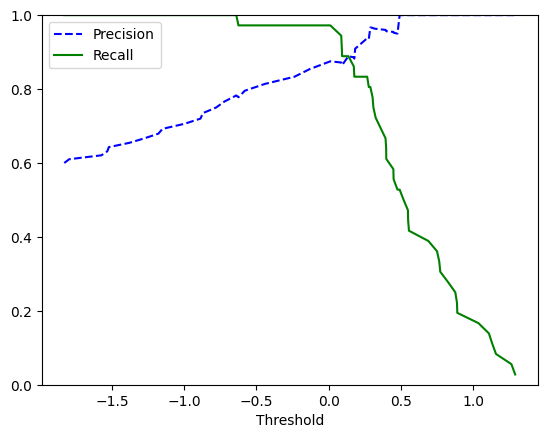

In [17]:
#plot PRC manually
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
y_scores = lr.decision_function(X_test) #returns the scores for each instance in the test set
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores) 
#threshold is the score at which the model decides whether to classify an instance as positive or negative
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="upper left")
plt.ylim([0, 1])
plt.show()

ROC

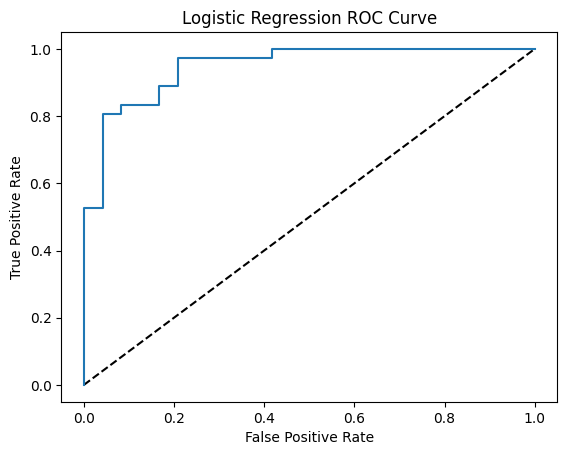

In [18]:
#plot the ROC curve
#ROC is the probability that the model will rank a random positive example more highly than a random negative example.
from sklearn.metrics import roc_curve
y_pred_prob_1 = lr.predict_proba(X_test)[:,1] #get the probabilities of the positive class
y_pred_prob_2 = lr.predict_proba(X_test)[:,0] #get the probabilities of the negative class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_1) #get the false positive rate, true positive rate, and thresholds

plt.plot([0,1], [0,1], 'k--') #plot the line y=x
plt.plot(fpr, tpr, label='Logistic Regression') #plot the ROC curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()
